# Week 7（プロジェクト課題）

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import datetime

In [45]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

## 世代重複モデル
世代重複モデルはソローモデルに個人の最適化行動を導入したモデルである。\
このモデルにおいて、各個人は若年期と老年期の２期間生き２期間後に死亡すると仮定し、各個人は次世代に遺産を残さないものとする。\
この仮定のもと、家計の効用最大化問題、企業の利益最大化問題、資金市場の均衡条件をそれぞれ求めることで一人当たりの資本の値を求めることができる。\
そこで実際に日本での世代重複モデルにおける一人当たりの資本の推移を観測し、定常状態における一人当たりの資本の値を導出することにする。

#### ・家計の行動
個人の効用最大化問題は以下の通りになる。
$$
\begin{equation}
    \begin{array}{111}
        \mbox{$\max_{c^y_t,c^0_{t+1}}$}
            & u(c^y_t)+\frac{1}{1+\rho} u(c^0_{t+1}) = \ln{c^y_t} +\frac{1}{1+\rho} \ln{c^0_{t+1}} &\\
        \mbox{s.t.}
            & c^y_t + s_t = w_t &\\
            & c^0_{t+1} = (1 + r_{t+1})s_t &
    \end{array}
\end{equation}
$$
ここで関数、各変数、パラメーターは以下の通りである。
- $u$: 個人の消費に対する効用関数
- $c^y_t$: 第ｔ期の若年世代の個人の消費
- $c^0_{t+1}$: 第ｔ期世代が第ｔ+1期に行う消費
- $\rho$: 各個人の時間選好率
- $s$: 貯蓄率
- $w$: 賃金率
- $r$: 利子率

上記の目的関数は、個人が自らの消費から得る効用のみを考慮して行動することを定式化したものである。\
制約条件は若年期と老年期それぞれの予算制約式を表している。\
この効用最大化問題を通して、効用を最大化にする最適な家計の貯蓄は以下の式で表せる。
$$s_t = \frac{1}{2+\rho}w_t$$

#### ・企業の行動
企業の利益最大化問題は以下の通りになる。

$$\max_{K,L}\ pf(k)-rK - wL$$

ここで関数、各変数、パラメーターは以下の通りである。
- $f$: 生産関数
- $p$: 価格
- $K$: 資本ストック
- $L$: 労働人口
- $k$: 一人当たりの資本
利潤最大化条件は以下の2式で表すことができる。

$$
\begin{equation*}
    \begin{array}{111}
    &f^{'}(k_t) = r_t&\\
    &f(k_t) - f^{'}(k_t)k_t = w_t&
    \end{array}
\end{equation*}
$$

#### ・資金市場の均衡
資金市場の均衡条件は以下の通りである。

$$K_{t+1}=s_tL_t$$

### 世代重複モデルのダイナミクス
労働人口$L$は成長率$n$で成長すると仮定することで、家計の貯蓄関数、企業の利益最大化条件、そして資金市場の均衡条件から一人当たりの資本は以下のように表せる。

$$ k_t = \frac{K_t}{L_t} = \frac{1}{(1+n)(2+\rho)}[f(k_t)-f^{'}(k_t)k_t]$$

また、$k^{*}_{OLG}$を世代重複モデルの定常状態における一人当たりの資本の値とし、生産関数をコブ＝ダグラス型、$f(k_t)=f_{\alpha}(k_t)=k^{\alpha}_t$とすると$k^{*}_{OLG}$は以下のように表せる。

$$k^*_{OLG} = (\frac{(1+n)(2+\rho)}{1-\alpha})^{\frac{1}{\alpha -1}}$$

## 世代重複モデルのシミュレーション
上記の結果をまとめると、世代重複モデルは以下のようにセットアップできる。

$$
\begin{aligned}
   K_t &= s_{t-1} L_{t-1}\\
   L_t &= (1+n) L_{t-1}\\
   k_t &= \frac{K_t}{L_t} = \frac{1}{(1+n)(2+\rho)}(1-\alpha)k^{\alpha}_{t-1}
\end{aligned}
$$

ここで各変数，パラメータの意味は以下の通りである。

- $K$: 資本ストック
- $s$: 貯蓄率
- $L$: 労働, 成長率 $n$ で変化
- $k$: 一人当たりの資本
- $\rho$: 時間選好率

ここで，

$$
G(K_{t-1}, L_{t-1}, k_{t-1}, s_{t-1})
=
\begin{bmatrix}
    s_{t-1} L_{t-1}\\
    (1 + n) L_{t-1}\\
    \frac{1}{(1+n)(2+\rho)}(1-\alpha)k^{\alpha}_{t-1}
\end{bmatrix}
$$

とする。ここで，$G$ は

- $n$ 
- $\rho$
- $\alpha$

に依存する。$n, \rho, \alpha$の値を入力することで$G$ を出力する関数 $OLG$を以下のように定義する。

In [46]:
def OLG(n, rho, alpha):
    
    def G(K, L, k, s):
        K0 = K
        L0 = L
        k0 = k
        s0 = s
        K1 = s0 * L0
        L1 = (1 + n) * L0
        k1 = ((1 - alpha) * k0**alpha) / ((1 + n) * (2 + rho))
        
        return np.array([K1, L1, k1])
    
    return G

また$OLG$で期間$T$のシミュレーションを行うための関数$simulate$を以下のように定義することでシミュレーションの準備が整う。

In [133]:
def simulate(G,x0, K, L, k, s, T):
    x = np.empty((T, *x0.shape))
    sim_K = np.empty(T)
    sim_L = np.empty(T)
    sim_k = np.empty(T)
    
    sim_K[0] = K[0] #初期値のみ実データを使う
    sim_L[0] = L[0] 
    sim_k[0] = k[0] 
    
    x[0] = x0
    for t in range(1, T):      
        x[t] = G(sim_K[t-1], sim_L[t-1], sim_k[t-1], s[t-1])
        sim_K[t] = x[t][0] #シミュレーションの結果を格納
        sim_L[t] = x[t][1]
        sim_k[t] = x[t][2]
        
    return x

$s, L, K$の値はFREDのデータを用いることにする。\
また、取得するデータの範囲を$1970/01/01～2017/01/01$までとする。

In [48]:
start = datetime.datetime(1970,1,1)
end = datetime.datetime(2017,1,1)

#貯蓄率のデータ#
SavingRate = pdr.DataReader('PSAVERT', 'fred', start, end)
#労働人口のデータ#
ActivePopulation = pdr.DataReader('LFAC64TTUSM647S', 'fred', start, end)
#資本ストックのデータ#
CapitalStock = pdr.DataReader('RKNANPUSA666NRUG', 'fred', start, end)

アメリカの労働人口と貯蓄率のデータが月ごとに対して、資本ストックのデータが年ごとであるため年ごとに合わせる。\
その後、配列に変形することでシミュレーションに利用することができる。

In [49]:
#貯蓄率のデータを年ごとのデータにし、配列に変形する#
s_value = SavingRate.resample('AS').last().reset_index()['PSAVERT'].values /100

In [50]:
#労働人口のデータを年ごとのデータにし、array配列に変形する#
L_value = ActivePopulation.resample('AS').last().reset_index()['LFAC64TTUSM647S'].values

In [51]:
#資本ストックのデータを年ごとのデータにし、array配列に変形する#
K_value = CapitalStock.resample('AS').last().reset_index()['RKNANPUSA666NRUG'].values

In [52]:
#各配列の要素を可視化
print(s_value)
print(L_value)
print(K_value)
k_value = K_value / L_value
print(k_value)

[0.132 0.13  0.137 0.148 0.14  0.12  0.106 0.114 0.104 0.101 0.114 0.125
 0.109 0.101 0.112 0.086 0.07  0.087 0.083 0.078 0.088 0.097 0.106 0.091
 0.072 0.061 0.064 0.064 0.058 0.044 0.042 0.045 0.055 0.054 0.069 0.037
 0.037 0.036 0.064 0.059 0.071 0.078 0.12  0.064 0.077 0.074 0.063 0.068]
[8.04241591e+07 8.24327637e+07 8.48863796e+07 8.79449502e+07
 8.97878689e+07 9.14786921e+07 9.44484615e+07 9.75061861e+07
 1.00799555e+08 1.03321037e+08 1.04462887e+08 1.06037769e+08
 1.07987074e+08 1.09326265e+08 1.11688899e+08 1.13406236e+08
 1.15638858e+08 1.17573665e+08 1.19354058e+08 1.21142205e+08
 1.22860196e+08 1.23398092e+08 1.25133051e+08 1.26508030e+08
 1.28123735e+08 1.28703431e+08 1.31120475e+08 1.33140630e+08
 1.34687202e+08 1.36207844e+08 1.39088961e+08 1.39932822e+08
 1.40759475e+08 1.41984958e+08 1.43181027e+08 1.44829739e+08
 1.47185585e+08 1.48116865e+08 1.48398509e+08 1.46563895e+08
 1.46876251e+08 1.46590319e+08 1.47621030e+08 1.46869633e+08
 1.47664498e+08 1.49008046e+08 1.503

In [53]:
#各データの要素数
print(len(s_value))
print(len(K_value))
print(len(L_value))
print(len(k_value))

48
48
48
48


要素数が48個あるので、シミュレーション期間$T$は48とする。
では実際にシミュレーションの結果と現実のデータを可視化し比較しよう。

In [125]:
#パラメーター
n = 0.01
rho =0.05
alpha = 0.05

#上記のパラメーターにおけるOLG
G_OLG = OLG(n = n, rho = rho, alpha = alpha)

#初期値
x0 = np.array([K_value[0], L_value[0], k_value[0]])

#シミュレーション
simulate(G_OLG, x0, K_value, L_value, k_value, s_value, 48)

array([[1.79947640e+07, 8.04241591e+07, 2.23748239e-01],
       [1.06159890e+07, 8.12284007e+07, 4.25732056e-01],
       [1.05596921e+07, 8.20406847e+07, 4.39648087e-01],
       [1.12395738e+07, 8.28610915e+07, 4.40355708e-01],
       [1.22634415e+07, 8.36897024e+07, 4.40391119e-01],
       [1.17165583e+07, 8.45265995e+07, 4.40392889e-01],
       [1.01431919e+07, 8.53718655e+07, 4.40392978e-01],
       [9.04941774e+06, 8.62255841e+07, 4.40392982e-01],
       [9.82971659e+06, 8.70878399e+07, 4.40392982e-01],
       [9.05713535e+06, 8.79587183e+07, 4.40392982e-01],
       [8.88383055e+06, 8.88383055e+07, 4.40392982e-01],
       [1.01275668e+07, 8.97266886e+07, 4.40392982e-01],
       [1.12158361e+07, 9.06239555e+07, 4.40392982e-01],
       [9.87801115e+06, 9.15301950e+07, 4.40392982e-01],
       [9.24454970e+06, 9.24454970e+07, 4.40392982e-01],
       [1.03538957e+07, 9.33699519e+07, 4.40392982e-01],
       [8.02981587e+06, 9.43036515e+07, 4.40392982e-01],
       [6.60125560e+06, 9.52466

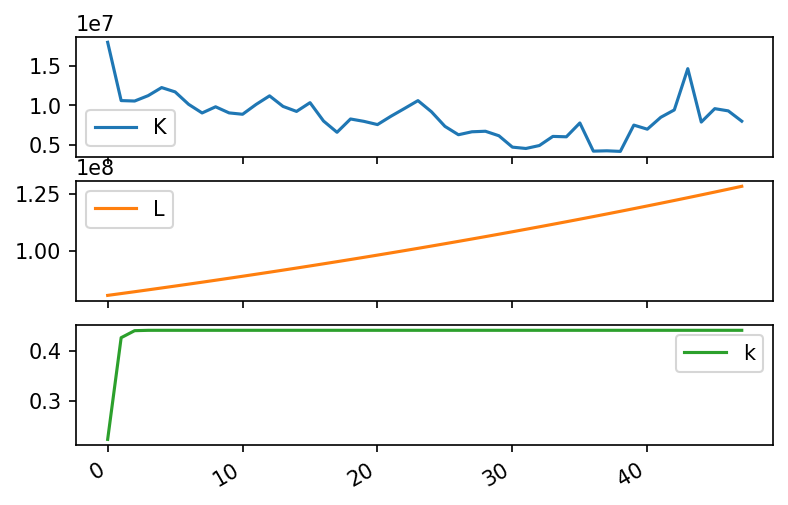

In [126]:
#シミュレーションの結果
y = simulate(G_OLG, x0, K_value, L_value, k_value, s_value, 48)
result = pd.DataFrame(y, columns=['K', 'L', 'k'])
result.plot(subplots=True);

In [127]:
#定常状態
k_OLG = ((1 + n) * (2 + rho) / (1 - alpha))**(1/(alpha - 1))
k_OLG

0.4403929824144472

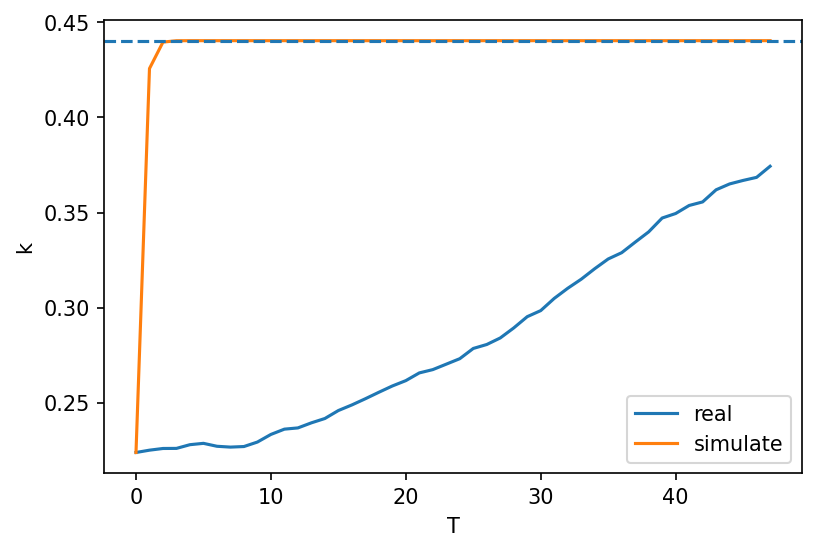

In [128]:
#一人当たりの資本の比較
plt.plot(k_value, label='real')
plt.plot(result['k'], label = 'simulate')
plt.axhline(k_OLG, linestyle='--');
plt.xlabel('T')
plt.ylabel('k')
plt.legend()

Text(0, 0.5, 'T')

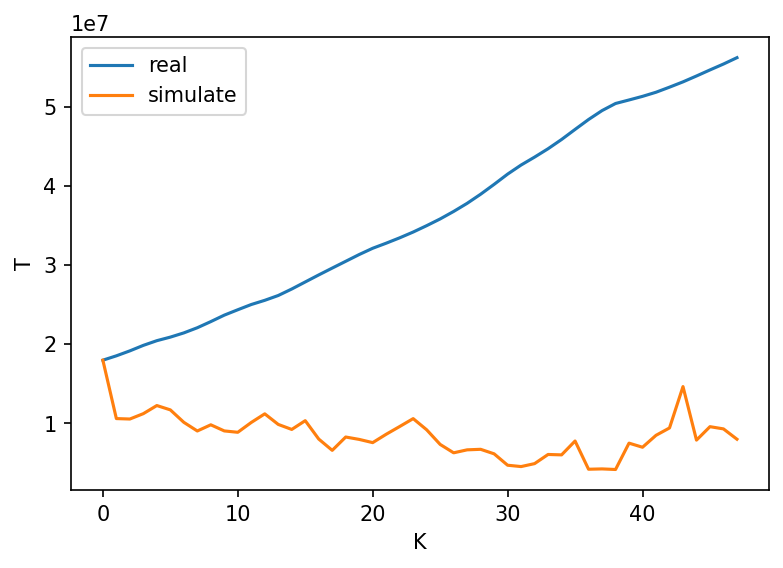

In [129]:
#資本ストックの比較
plt.plot(K_value, label = 'real')
plt.plot(result['K'], label = 'simulate')
plt.legend()
plt.xlabel('K')
plt.ylabel('T')

Text(0, 0.5, 'T')

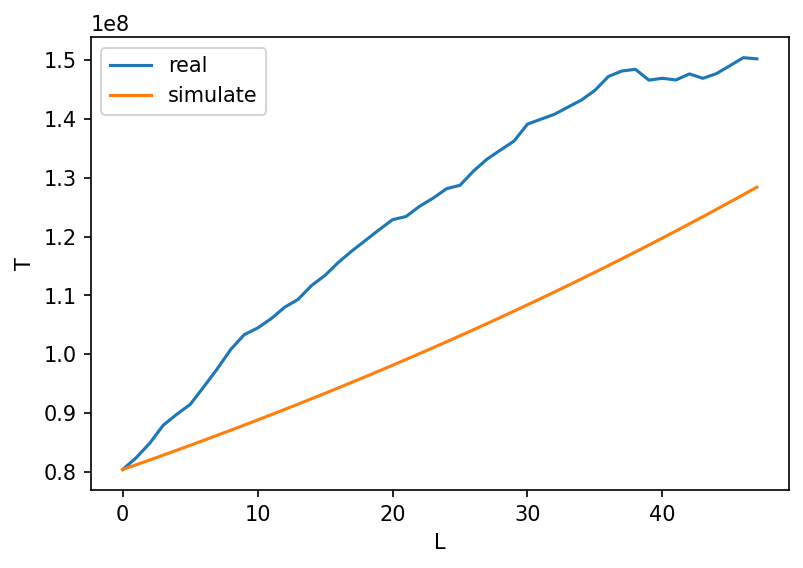

In [130]:
#労働人口の比較
plt.plot(L_value, label = 'real')
plt.plot(result['L'], label = 'simulate')
plt.legend()
plt.xlabel('L')
plt.ylabel('T')

## まとめ
上記のパラメーターで設定したシミュレーションにおいて、一人当たりの資本の値が定常状態に収束していく様子を確認することができた。\
しかし、現実とシミュレーションの乖離が見受けられる結果となった。\
乖離が生じた一番の要因として貯蓄率の低さが考えられる。\
というのも貯蓄率の平均が0.0845と低い水準であるため、理論の下では資本ストックが低い水準に位置づけられるのは明らかであり、最終的に一人当たりの資本がシミュレーションの結果に比べて小さくなると容易に推測できる。\
また二つ目の要因としてパラメーターの設定であろう。統計学の手法を用いて$n, \rho, \alpha$の推定を行い、最適な値を使用するべきであった。\
したがって今回のシミュレーションと現実の比較から、資金市場の均衡式$K_{t+1} = s_t L_{t}$の改良と$n, \rho, \alpha$の推定を行うことでシミュレーションの質は向上すると考えられる。

In [131]:
s_value.mean()

0.08447916666666666

## 参考文献
- 二神 孝一(2012)『動学マクロ経済学［成長理論の発展］』, pp59-65, 日本評論社
- U.S. Bureau of Economic Analysis, Personal Saving Rate [PSAVERT], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PSAVERT, July 14, 2020.
- Organization for Economic Co-operation and Development, Active Population: Aged 15-64: All Persons for the United States [LFAC64TTUSM647S], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/LFAC64TTUSM647S, July 15, 2020.
- University of Groningen and University of California, Davis, Capital Stock at Constant National Prices for United States [RKNANPUSA666NRUG], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RKNANPUSA666NRUG, July 14, 2020.